# Companies Analisys: exploring data of companing with same name

This notebook provides an exploratory analysis on companies with the same name but different CNPJ's. On this analysis it'll be tried to know more about their existence through an exploratory analysis, and possibly get more insights for new irregularities.

In [1]:
from serenata_toolbox.datasets import Datasets
from pylab import rcParams
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Charts styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 8
matplotlib.rcParams.update({'font.size': 14})
pd.options.display.max_rows = 100000
pd.options.display.max_columns = 10000

# First, lets download all the needed datasets for this analysis
datasets = Datasets('../data/')
                             
reimbursments_path = Path("../data/2017-07-04-reimbursements.xz")
companies_path = Path("../data/2017-05-21-companies-no-geolocation.xz")

if not reimbursments_path.exists():
    datasets.downloader.download('2017-07-04-reimbursements.xz')

if not companies_path.exists():
    datasets.downloader.download('2017-05-21-companies-no-geolocation.xz')

In [2]:
# Loading companies dataset
CP_DTYPE =dict(cnpj=np.str, name=np.str,
               main_activity_code='category', legal_entity='category',
               partner_1_name=np.str, partner_1_qualification='category',
               partner_2_name=np.str, partner_2_qualification='category',
               situation='category', state='category',
               status='category', type='category')

companies = pd.read_csv(str(companies_path),
                        dtype=CP_DTYPE, low_memory=False,
                        parse_dates=['last_updated', 'situation_date', 'opening'])

# Cleaning columns with more then 30000 NaN values
# companies = companies.dropna(axis=[0, 1], how='all').dropna(axis=1, thresh=30000)
companies['cnpj'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

c = companies[['cnpj', 'last_updated', 'legal_entity', 'main_activity_code',
               'name', 'opening', 'partner_1_name', 'partner_1_qualification',
               'partner_2_name', 'partner_2_qualification',
               'situation', 'situation_date', 'state', 'status', 'type']]

c.columns.values[0] = 'cnpj_cpf'

c.head(5)

,cnpj_cpf,last_updated,legal_entity,main_activity_code,name,opening,partner_1_name,partner_1_qualification,partner_2_name,partner_2_qualification,situation,situation_date,state,status,type
0,04636932000186,2017-01-14 07:32:18.041,213-5 - Empresário (Individual),56.11-2-03,IVO M DIAS - ME,1980-02-04,NaN,NaN,NaN,NaN,ATIVA,2005-03-11,RO,OK,MATRIZ
1,28232643000180,2017-04-14 00:09:24.747,206-2 - Sociedade Empresária Limitada,47.31-8-00,POSTO DE SERVICO CAMBOATA LTDA,1984-03-21,DOMINGOS GONCALVES DOS SANTOS,49-Sócio-Administrador,SEBASTIAO CORDEIRO BARBOSA,49-Sócio-Administrador,ATIVA,2004-02-10,RJ,OK,MATRIZ
2,18005070000106,2017-01-12 18:55:54.830,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO PRINCIPE III LTDA,2012-09-25,ARLINDO SERAFIM,05-Administrador,CLINEU LISSONI,05-Administrador,ATIVA,2012-09-25,SP,OK,MATRIZ
3,17793398000163,2017-03-22 03:30:12.675,206-2 - Sociedade Empresária Limitada,70.20-4-00,"ACELE - TREINAMENTO, ASSESSORIA E CONSULTORIA ...",2013-03-18,LEONARDO AUGUSTO FRETTA JOSE,49-Sócio-Administrador,ZELIA ANITA FRETTA JOSE,22-Sócio,ATIVA,2013-03-18,SC,OK,MATRIZ
4,32021479000139,2017-03-24 05:05:30.038,230-5 - Empresa Individual de Responsabilidade...,77.11-0-00,CAIRU AUTO CENTER EIRELI - EPP,1988-04-21,CARLOS ALBERTO CAMPOS DE ANDRADE,65-Titular Pessoa Física Residente ou Domicili...,NaN,NaN,ATIVA,2005-03-11,RJ,OK,MATRIZ


In [3]:
# Loading reimbursments dataset
R_DTYPE =dict(cnpj_cpf=np.str, year=np.int16, month=np.int16,
              installment='category', term_id='category',
              term='category', document_type='category',
              subquota_group_id='category',
              subquota_group_description='category',
              subquota_number='category', state='category',
              party='category')

reimbursements = pd.read_csv(str(reimbursments_path),
                             dtype=R_DTYPE, low_memory=False, parse_dates=['issue_date'])

r = reimbursements[['year', 'month', 'total_net_value', 'party',
                    'state', 'term', 'issue_date', 'congressperson_name',
                    'subquota_description','supplier', 'cnpj_cpf']]

r.head(10)

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
0,2009,4,130.00,PP,PR,2015.0,2009-04-06 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,MELHOR POSTO DE COMBUSTÍVEIS LTDA,02989654001197
1,2009,4,135.00,PP,PR,2015.0,2009-04-07 00:00:00,DILCEU SPERAFICO,"Locomotion, meal and lodging",MELONGENA PARTICIPAÇÕES LTDA,09259358000450
2,2009,3,1000.00,PP,PR,2015.0,2009-03-12 00:00:00,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,ARY ANTONIO MOSCHETTA,01537369920
3,2009,4,170.00,PP,PR,2015.0,2009-04-14 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,CONVER COMBUSTÍVEIS AUTOMÓVEIS LTDA,00038505000579
4,2009,4,100.11,PP,PR,2015.0,2009-04-09 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,GRANDO E GROFF LTDA,00161576000211
5,2009,4,11.40,PP,PR,2015.0,2009-04-04 00:00:00,DILCEU SPERAFICO,Software purchase or renting; Postal services;...,WERMUTH SERVIÇOS POSTAIS FRANQUEADOS LTDA,03006516000131
6,2009,4,40.70,PP,PR,2015.0,2009-04-08 00:00:00,DILCEU SPERAFICO,"Locomotion, meal and lodging",BARBATO E NOGUEIRA LTDA,77559425000160
7,2009,3,93.40,PP,PR,2015.0,2009-03-06 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,AJ BORDIGNON E CIA LTDA,00683770000186
8,2009,3,116.53,PP,PR,2015.0,2009-03-20 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,AJ BORDIGNON E CIA LTDA,00683770000186
9,2009,3,113.56,PP,PR,2015.0,2009-03-26 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,AJ BORDIGNON E CIA LTDA,00683770000186


In [4]:
# r.groupby(['supplier', 'congressperson_name', 'year'])['total_net_value'].sum().sort_values(ascending=False).head(20)
filtered_c = c[c['cnpj_cpf'].isin(r.cnpj_cpf.unique())]
data = r.merge(filtered_c, on='cnpj_cpf', how='left')
data = data[data.year >= 2016]

data.head(10)

,year,month,total_net_value,party,state_x,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf,last_updated,legal_entity,main_activity_code,name,opening,partner_1_name,partner_1_qualification,partner_2_name,partner_2_qualification,situation,situation_date,state_y,status,type
1361669,2016,1,175.06,PP,PR,2015.0,2016-01-18 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,CASCOL COMBUSTÍVEIS PARA VEÍCULOS LTDA,00306597006308,2017-01-16 07:47:51.652,206-2 - Sociedade Empresária Limitada,47.31-8-00,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,2012-03-01,NaN,NaN,NaN,NaN,ATIVA,2012-03-01,DF,OK,FILIAL
1361670,2016,1,116.11,PP,PR,2015.0,2016-01-01 00:00:00,DILCEU SPERAFICO,Telecommunication,TIM CELULAR S/A,04206050012863,2017-03-30 03:58:38.883,205-4 - Sociedade Anônima Fechada,61.20-5-01,TIM CELULAR S.A.,2006-06-30,NaN,NaN,NaN,NaN,ATIVA,2006-06-30,PR,OK,FILIAL
1361671,2016,1,662.27,PP,PR,2015.0,2016-01-01 00:00:00,DILCEU SPERAFICO,Telecommunication,TIM CELULAR S/A,04206050012863,2017-03-30 03:58:38.883,205-4 - Sociedade Anônima Fechada,61.20-5-01,TIM CELULAR S.A.,2006-06-30,NaN,NaN,NaN,NaN,ATIVA,2006-06-30,PR,OK,FILIAL
1361672,2016,1,169.06,PP,PR,2015.0,2016-01-07 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ
1361673,2016,1,143.15,PP,PR,2015.0,2016-01-07 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ
1361674,2016,1,68.11,PP,PR,2015.0,2016-01-10 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ
1361675,2016,1,220.00,PP,PR,2015.0,2016-01-18 00:00:00,DILCEU SPERAFICO,Publicity of parliamentary activity,Jornal Impacto,19524954000121,2017-03-10 13:16:40.869,213-5 - Empresário (Individual),00.00-0-00,PEDRO ELIAS FURQUIM PEREIRA JUNIOR 07130076992,2014-01-15,NaN,NaN,NaN,NaN,BAIXADA,2016-12-15,NaN,OK,MATRIZ
1361676,2016,1,300.00,PP,PR,2015.0,2016-01-30 00:00:00,DILCEU SPERAFICO,Publicity of parliamentary activity,JORNAL PORTAL MISSAL,14645797000199,2017-02-20 13:04:20.267,206-2 - Sociedade Empresária Limitada,58.12-3-01,EDITORA T.C.B. LTDA - ME,2011-10-11,TAYLINI CRISTINA BASEI,30-Sócio Menor (Assistido/Representado),MAICON VITOR BASEI,49-Sócio-Administrador,ATIVA,2011-10-11,PR,OK,MATRIZ
1361677,2016,1,1500.00,PP,PR,2015.0,2016-01-22 00:00:00,DILCEU SPERAFICO,Publicity of parliamentary activity,RADIO INDEPENDENCIA DE MEDIANEIRA LTDA,75543470000109,2017-04-05 21:55:32.068,206-2 - Sociedade Empresária Limitada,60.10-1-00,RADIO INDEPENDENCIA DE MEDIANEIRA LTDA - ME,1974-05-20,MOACIR JOSE HANZEN,49-Sócio-Administrador,TCHARLES HENRIQUE HANZEN,22-Sócio,ATIVA,2005-03-11,PR,OK,MATRIZ
1361678,2016,1,178.53,PP,PR,2015.0,2016-01-15 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ


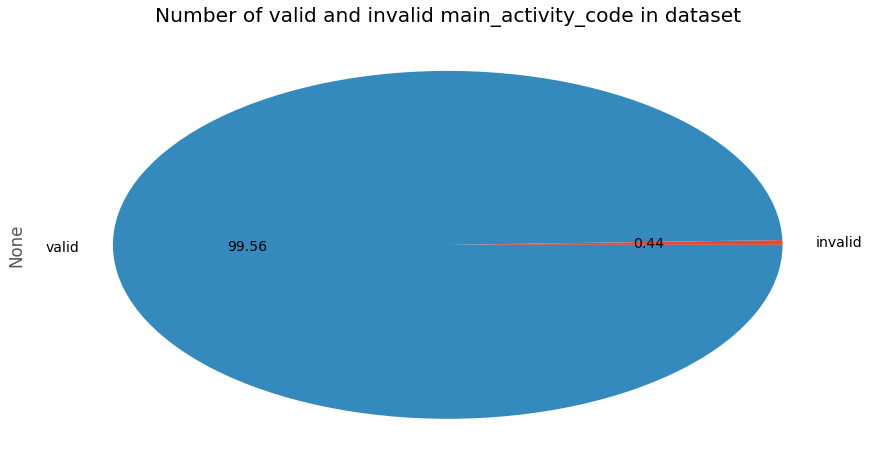

In [5]:
# count objects with invalid main_activity_code
d = dict()

invalid_main_activity = "00.00-0-00"
data_len = len(data)

d['valid'] = len(data[data.main_activity_code != invalid_main_activity]) / data_len * 100
d['invalid'] = len(data[data.main_activity_code == invalid_main_activity]) / data_len * 100

s = pd.Series(d)
s.plot(kind='pie', autopct='%.2f')
plt.title('Number of valid and invalid main_activity_code in dataset')

In [6]:
# remove items with invalid main_activity_code
data = data[data.main_activity_code != "00.00-0-00"]
print('dataset shape: {}.'.format(data.shape))

data.head(5)

dataset shape: (256414, 25).


,year,month,total_net_value,party,state_x,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf,last_updated,legal_entity,main_activity_code,name,opening,partner_1_name,partner_1_qualification,partner_2_name,partner_2_qualification,situation,situation_date,state_y,status,type
1361669,2016,1,175.06,PP,PR,2015.0,2016-01-18 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,CASCOL COMBUSTÍVEIS PARA VEÍCULOS LTDA,00306597006308,2017-01-16 07:47:51.652,206-2 - Sociedade Empresária Limitada,47.31-8-00,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,2012-03-01,NaN,NaN,NaN,NaN,ATIVA,2012-03-01,DF,OK,FILIAL
1361670,2016,1,116.11,PP,PR,2015.0,2016-01-01 00:00:00,DILCEU SPERAFICO,Telecommunication,TIM CELULAR S/A,04206050012863,2017-03-30 03:58:38.883,205-4 - Sociedade Anônima Fechada,61.20-5-01,TIM CELULAR S.A.,2006-06-30,NaN,NaN,NaN,NaN,ATIVA,2006-06-30,PR,OK,FILIAL
1361671,2016,1,662.27,PP,PR,2015.0,2016-01-01 00:00:00,DILCEU SPERAFICO,Telecommunication,TIM CELULAR S/A,04206050012863,2017-03-30 03:58:38.883,205-4 - Sociedade Anônima Fechada,61.20-5-01,TIM CELULAR S.A.,2006-06-30,NaN,NaN,NaN,NaN,ATIVA,2006-06-30,PR,OK,FILIAL
1361672,2016,1,169.06,PP,PR,2015.0,2016-01-07 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ
1361673,2016,1,143.15,PP,PR,2015.0,2016-01-07 00:00:00,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101,2017-02-03 12:36:29.016,206-2 - Sociedade Empresária Limitada,47.31-8-00,AUTO POSTO TOLECEMA LTDA,1995-04-19,HARDY ALENCAR RICHTER,49-Sócio-Administrador,ADILSON JOSE TERRA,49-Sócio-Administrador,ATIVA,2002-02-16,PR,OK,MATRIZ


In [7]:
labels = ['party', 'state_x', 'term', 'issue_date', 'congressperson_name', 
          'subquota_description', 'supplier', 'cnpj_cpf', 'legal_entity', 
          'main_activity_code', 'name', 'partner_1_name', 'partner_1_qualification', 
          'partner_2_name', 'partner_2_qualification', 'situation', 'state_y',
          'status', 'type']

df = pd.DataFrame()
for l in labels:
    df[l] = data[l].astype('category').cat.codes
    
df.head()

,party,state_x,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf,legal_entity,main_activity_code,name,partner_1_name,partner_1_qualification,partner_2_name,partner_2_qualification,situation,state_y,status,type
1361669,7,17,1,51,140,5,5766,364,10,130,5357,-1,-1,-1,-1,0,6,0,0
1361670,7,17,1,34,140,14,24821,4938,9,238,21495,-1,-1,-1,-1,0,18,0,0
1361671,7,17,1,34,140,14,24821,4938,9,238,21495,-1,-1,-1,-1,0,18,0,0
1361672,7,17,1,40,140,5,4340,619,10,130,3851,6385,11,111,13,0,18,0,1
1361673,7,17,1,40,140,5,4340,619,10,130,3851,6385,11,111,13,0,18,0,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

df = scale(df)

# Benchmark clusters
X, _, = train_test_split(df, train_size=0.2, random_state=2)

In [ ]:
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# print(42 * '_')
# print('init\t\ttime\tinertia\tsilhouette')

# def bench_k_means(estimator, name, data, labels=0):
#     t0 = time()
#     print('antes do fit')
#     estimator.fit(data)
#     print('%-9s\t%.2fs\t%i\t%.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))

# bench_k_means(KMeans(n_clusters=2,  n_init=10), name="KMeans (20)", data=X)
# # bench_k_means(KMeans(n_clusters=3), name="KMeans (30)", data=X)
# # bench_k_means(KMeans(n_clusters=4), name="KMeans (40)", data=X)
# # bench_k_means(KMeans(n_clusters=5), name="KMeans (50)", data=X)

# bench_k_means(KMeans(n_clusters=2), name="PCA-based (20)", data=PCA(n_components=2).fit(X).compents_)
# # bench_k_means(KMeans(init=PCA(n_components=30).fit(X).components_, n_clusters=30,  n_init=1),
# #               name="PCA-based (30)", data=X)
# # bench_k_means(KMeans(init=PCA(n_components=40).fit(X).components_, n_clusters=40,  n_init=1),
# #               name="PCA-based (40)", data=X)
# # bench_k_means(KMeans(init=PCA(n_components=50).fit(X).components_, n_clusters=50,  n_init=1),
# #               name="PCA-based (50)", data=X)

# print(42 * '_')

In [ ]:
from sklearn.cluster import DBSCAN

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_

print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)